In [1]:
import pandas as pd
import matplotlib.pyplot as plt

## Sessile Biomass

In [2]:

m_df = pd.read_csv('Mtot_fraction.dat', 
                 sep=r'\s+',   
                 header=None, 
                 names=['time', 'M']) 

print(m_df.head())


    time         M
0      0  0.000750
1  10000  0.000970
2  20000  0.001242
3  30000  0.001576
4  40000  0.001977


## EPS

In [3]:

eps_df = pd.read_csv('EPS_fraction.dat', 
                 sep=r'\s+',   
                 header=None, 
                 names=['time', 'EPS']) 

print(eps_df.head())


    time       EPS
0      0  0.000500
1  10000  0.000526
2  20000  0.000550
3  30000  0.000575
4  40000  0.000604


## Merge

In [4]:
df = m_df.merge(eps_df, on='time')
df

,time,M,EPS
0,0,7.500000e-04,5.000000e-04
1,10000,9.700690e-04,5.263150e-04
2,20000,1.241770e-03,5.497650e-04
3,30000,1.576030e-03,5.752070e-04
4,40000,1.976800e-03,6.040810e-04
...,...,...,...
82,820000,4.661880e-12,5.452410e-13
83,830000,4.661880e-12,5.416860e-13
84,840000,4.661880e-12,5.390850e-13
85,850000,4.661880e-12,5.370770e-13


NameError: name 'ax2' is not defined

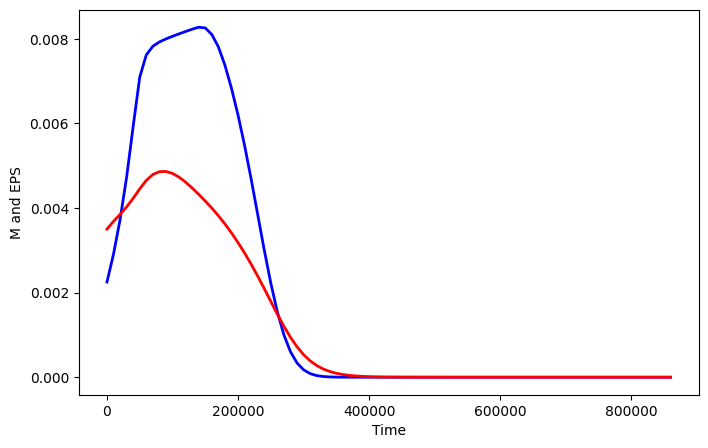

In [5]:
df['EPS_over_M'] = df['EPS']*7 / (df['M']*3+df['EPS']*7)

fig, ax1 = plt.subplots(figsize=(8,5))

ax1.plot(df['time'], df['M']*3, label='M', color='blue', linewidth=2)
ax1.plot(df['time'], df['EPS']*7, label='EPS', color='red', linewidth=2)
ax1.set_xlabel('Time')
ax1.set_ylabel('M and EPS', color='black')
ax1.tick_params(axis='y')

# ax2 = ax1.twinx()
# ax2.plot(df['time'], df['EPS_over_M'], label='EPS/M', color='green', linestyle='--', linewidth=2)
# ax2.set_ylabel('EPS/M')
# ax2.tick_params(axis='y')

lines1, labels1 = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax1.legend(lines1 + lines2, labels1 + labels2, loc='upper left')

plt.title('M, EPS, and EPS/M over Time')
plt.grid(True)
plt.tight_layout()
plt.show()


In [6]:

biomass_df = pd.read_csv('biomass.dat', 
                 sep=r'\s+',   
                 header=None, 
                 names=['time', 'B']) 

print(biomass_df.head())


    time         B
0      0  0.002500
1  10000  0.005278
2  20000  0.005278
3  30000  0.005278
4  40000  0.005278


<AxesSubplot:xlabel='time'>

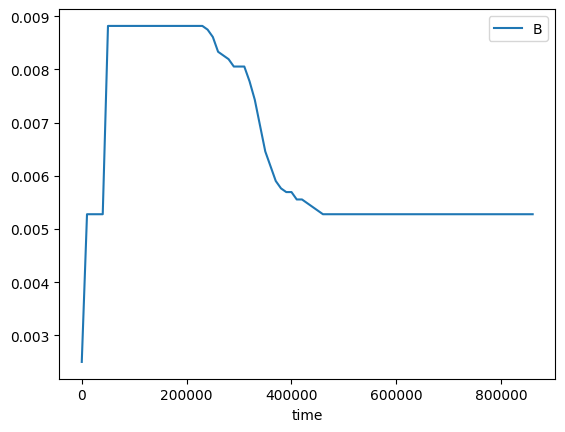

In [7]:
biomass_df.plot(x='time', y='B')